# SVM and PCA:

----------------------------------------------------------------------------------------------


In [64]:
# Importing libraries and packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics

from pickle import dump, load
from keras.utils import np_utils

%matplotlib inline

In [65]:
# Collect data
pickle_dir = 'TFS_Dataset/Pickle/'

In [66]:
# Number of total classes
NUM_CATEGORIES = 43


# Resizing the images to 32x32x3
img_height = 32
img_width = 32
channels = 3

# reshape image size
n_features = 1024  ## 32 * 32 = 1024

## Load Pickle file data


In [67]:
# Load all Training images & label data
fid = open((pickle_dir+'X_train_y_train_gray.pkl'), 'rb')
X_train_gray,y_train_gray = load(fid)
fid.close()

# Load all Testing images & label data
fid = open((pickle_dir+'X_test_y_test_gray.pkl'), 'rb')
X_test_gray,y_test_gray = load(fid)
fid.close()

# Load Traffic sign Classes
fid = open((pickle_dir+'Traffic_sign_Classes.pkl'), 'rb')
traffic_classes = load(fid)
fid.close()

## Summary

In [68]:
print("Number of Training examples =", len(X_train_gray))
print("Number of Testing examples =", len(X_test_gray))
print("Image data shape =", (X_train_gray.shape))
print("Number of classes =", len(traffic_classes))

Number of Training examples = 39209
Number of Testing examples = 12630
Image data shape = (39209, 32, 32)
Number of classes = 43


## Reshape training, testing and validation data


In [76]:
print("X_train_gray shape before reshape : ",X_train_gray.shape)
print("X_test_gray shape before reshape: ",X_test_gray.shape)

X_train_gray shape before reshape :  (39209, 32, 32)
X_test_gray shape before reshape:  (12630, 32, 32)


In [77]:
# building the input vector from the 32x32 pixels
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], n_features)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], n_features)

In [78]:
print("X_train_gray shape after reshape : ",X_train_gray.shape)
print("X_test_gray shape after reshape: ",X_test_gray.shape)


X_train_gray shape after reshape :  (39209, 1024)
X_test_gray shape after reshape:  (12630, 1024)


In [79]:
print("y_train :",y_train_gray.shape)
print("y_test :",y_test_gray.shape)

y_train : (39209,)
y_test : (12630,)


In [80]:
X_train_gray

array([[ 43,  51,  48, ...,  46,  59,  52],
       [119, 155, 208, ..., 179, 175, 197],
       [123, 176, 160, ...,  38,  39,  39],
       ...,
       [255, 255, 252, ..., 226, 221, 222],
       [109, 128, 202, ...,  46,  49,  46],
       [174, 204, 203, ..., 105, 101, 100]], dtype=uint8)

## Normalize each column of your feature matrix using preprocessing.scale


In [81]:
# normalize the data
X_train_gray = preprocessing.scale(X_train_gray)
X_test_gray = preprocessing.scale(X_test_gray)
print(X_train_gray)

[[-0.59255351 -0.48713397 -0.52921723 ... -0.35216126 -0.1412604
  -0.24908881]
 [ 0.40507732  0.87800471  1.57016444 ...  1.73709442  1.69009929
   2.02650958]
 [ 0.4575842   1.15365771  0.94034994 ... -0.47783077 -0.45701207
  -0.45310797]
 ...
 [ 2.19031143  2.19063805  2.1474944  ...  2.47540282  2.41632813
   2.41885413]
 [ 0.2738101   0.5235937   1.49143763 ... -0.35216126 -0.29913623
  -0.3432515 ]
 [ 1.12704699  1.52119505  1.50455876 ...  0.57465141  0.52181811
   0.50421273]]


# PCA (Principal Component Analysis)

In [49]:
from  sklearn.decomposition  import  PCA

k = 50  
my_pca = PCA(n_components = k)

X_Train_new = my_pca.fit_transform(X_train_gray)

X_Test_new = my_pca.transform(X_test_gray)

In [50]:
print(X_Train_new.shape)
print(X_Test_new.shape)

(39209, 50)
(12630, 50)


# SVM classifier 

In [55]:
%%time

from sklearn.svm import SVC

my_SVM= SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1,probability=True)
my_SVM.fit(X_Train_new, y_train_gray)

y_predict= my_SVM.predict(X_Test_new)

accuracy_svm = accuracy_score(y_test_gray, y_predict)

print("Support Vector Machine accuracy: ",accuracy_svm)

Support Vector Machine accuracy:  0.5601741884402217
CPU times: user 7min 23s, sys: 811 ms, total: 7min 24s
Wall time: 7min 24s


### Estimating the Probability (likelihood) of happening an Event: 


In [57]:
# Estimating the probability (likelihood) of Each Label: 
from sklearn import metrics
from sklearn.utils import resample
y_predict_prob_svm = my_SVM.predict_proba(X_Test_new)

print(y_predict)
print(y_predict_prob_svm[:,1])

[12 12  1 ...  1  1 18]
[0.06445428 0.25040384 0.89778351 ... 0.45544923 0.80367579 0.09418928]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [61]:

fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_test_gray, y_predict_prob_svm[:,1], pos_label=1)

print(fpr_svm)
print("\n")
print(tpr_svm)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.51889169e-04
 2.51889169e-04 3.35852225e-04 3.35852225e-04 4.19815281e-04
 4.19815281e-04 5.03778338e-04 5.03778338e-04 5.87741394e-04
 5.87741394e-04 6.71704450e-04 6.71704450e-04 7.55667506e-04
 7.55667506e-04 8.39630563e-04 8.39630563e-04 9.23593619e-04
 9.23593619e-04 1.00755668e-03 1.00755668e-03 1.09151973e-03
 1.09151973e-03 1.25944584e-03 1.25944584e-03 1.34340890e-03
 1.34340890e-03 1.51133501e-03 1.51133501e-03 1.59529807e-03
 1.59529807e-03 1.76322418e-03 1.76322418e-03 1.84718724e-03
 1.84718724e-03 1.93115029e-03 1.93115029e-03 2.01511335e-03
 2.01511335e-03 2.09907641e-03 2.09907641e-03 2.18303946e-03
 2.18303946e-03 2.26700252e-03 2.26700252e-03 2.35096558e-03
 2.35096558e-03 2.43492863e-03 2.43492863e-03 2.51889169e-03
 2.51889169e-03 2.60285474e-03 2.60285474e-03 2.77078086e-03
 2.77078086e-03 2.85474391e-03 2.85474391e-03 2.93870697e-03
 2.93870697e-03 3.02267003e-03 3.02267003e-03 3.10663308e-03
 3.10663308e-03 3.358522

### AUC:

In [62]:
# AUC:
AUC_svm = metrics.auc(fpr_svm, tpr_svm)
print(AUC_svm)

0.9662608452280996


### ROC Curve:

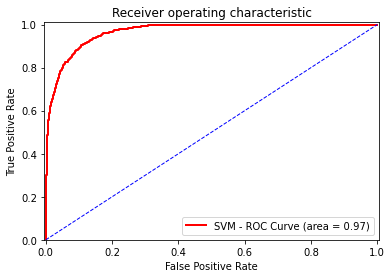

In [63]:
plt.figure()

# Roc Curve:
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM - ROC Curve (area = %0.2f)' % AUC_svm)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [18]:
cm_SVM = metrics.confusion_matrix(y_test_gray, y_predict)

print("Confusion matrix:")
print(cm_SVM)

Confusion matrix:
[[  0  36  16 ...   0   0   0]
 [  0 500 122 ...   0   0   0]
 [  1  89 360 ...   2   0   0]
 ...
 [  0   3   2 ...  49   0   0]
 [  0   0   0 ...   0  18  15]
 [  0   0   0 ...   0  20   8]]


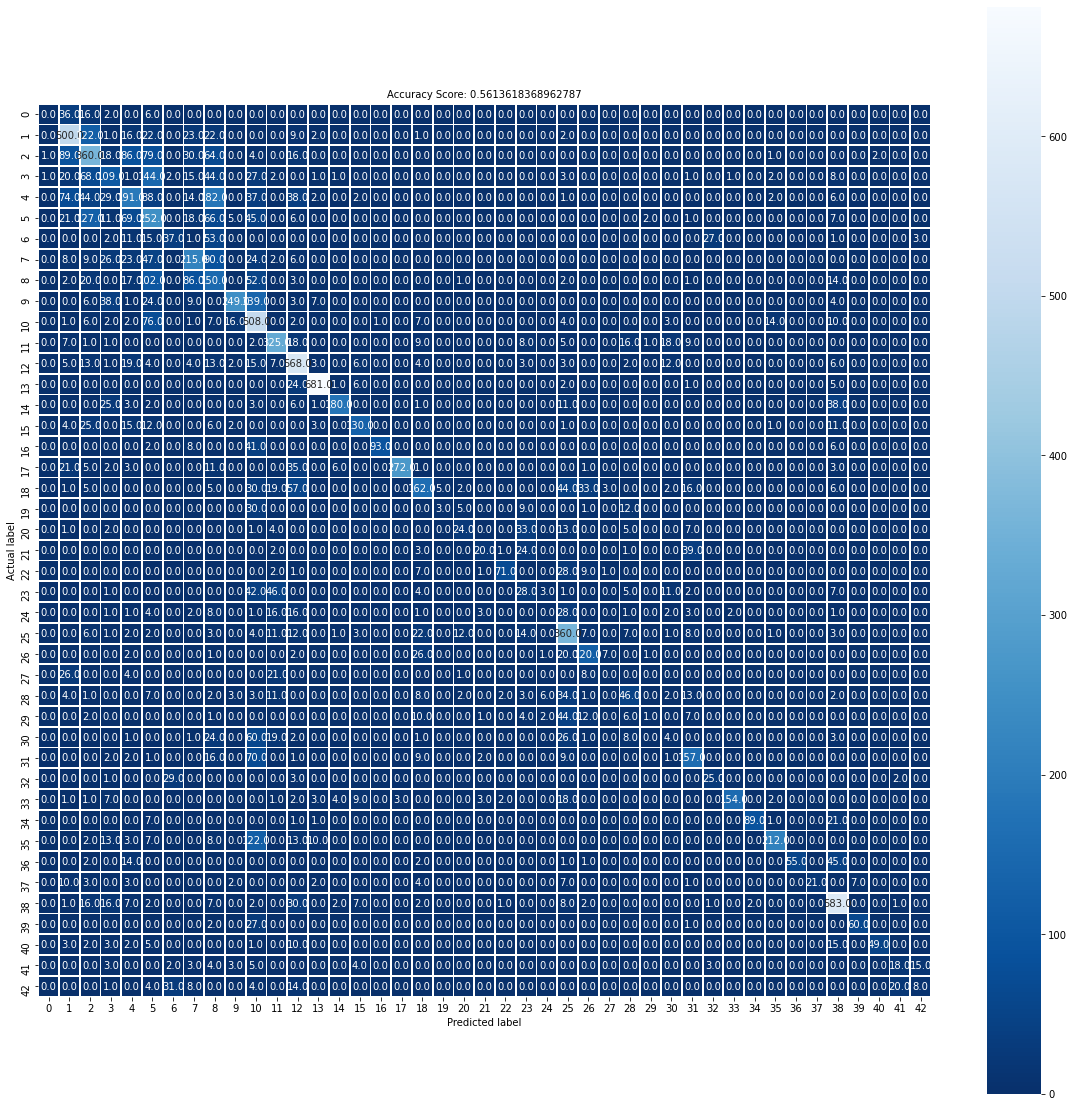

In [19]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(cm_SVM, annot=True, fmt=".1f", linewidths=.8, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_svm)
plt.title(all_sample_title, size = 10);

## Combine training and testing data :


In [82]:
X = np.concatenate((X_train_gray, X_test_gray))
y = np.concatenate((y_train_gray, y_test_gray))

In [83]:
X

array([[-0.59255351, -0.48713397, -0.52921723, ..., -0.35216126,
        -0.1412604 , -0.24908881],
       [ 0.40507732,  0.87800471,  1.57016444, ...,  1.73709442,
         1.69009929,  2.02650958],
       [ 0.4575842 ,  1.15365771,  0.94034994, ..., -0.47783077,
        -0.45701207, -0.45310797],
       ...,
       [ 0.1932013 ,  0.01714963,  0.95272565, ...,  0.9497528 ,
         0.85798182,  0.17091457],
       [-0.49833476, -0.6322847 , -0.61976803, ..., -0.43242756,
        -0.43029419, -0.46146959],
       [-0.22714415, -0.05049978, -0.22664461, ..., -0.14970885,
         1.60300891,  2.05264308]])

In [84]:
y

array([ 6, 33, 17, ...,  4,  1, 38])

In [85]:
print("X:",X.shape)
print("y:",y.shape)

X: (51839, 1024)
y: (51839,)


# GridSearchCV to find the best value for parameter C in your SVM:


In [86]:
from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
param_grid = {'C': [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5] }


In [87]:
%%time
# instantiate the model:
my_SVM_new= SVC(kernel='rbf', gamma=0.0005, random_state=1)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_SVM_new, param_grid, cv=10, scoring='accuracy')


CPU times: user 653 µs, sys: 6.43 ms, total: 7.08 ms
Wall time: 13.6 ms


In [88]:
my_pca_new = PCA(n_components = k)

X_new = my_pca_new.fit_transform(X)

In [89]:
X_new.shape

(51839, 50)

In [90]:
%%time
# fit the grid (start the grid search):
grid.fit(X_new, y)

CPU times: user 1h 53min 50s, sys: 16 s, total: 1h 54min 6s
Wall time: 1h 55min 10s


GridSearchCV(cv=10, estimator=SVC(gamma=0.0005, random_state=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0,
                               50000.0, 100000.0]},
             scoring='accuracy')

In [91]:
# view the best results corresponding to the best structure of ANN:
print("\nBest Support Vector Machine accuracy: ",grid.best_score_)
print("\nBest C value for Support Vector Machine : ",grid.best_params_)


Best Support Vector Machine accuracy:  0.9387330307951208

Best C value for Support Vector Machine :  {'C': 1000.0}
